# MSDS 432, Assignment 5 - Hash Table

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
import array as arr

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Sample Data

In [6]:
characters = [chr(i) for i in range(97,123)] # character look-up

def gen_code():
    return ''.join([characters[int(np.random.uniform(0, 26))] for k in range(0, 10)]) # generate a random name

names = list() # names list

for index in range(100): # populate it
    names.append(gen_code())
    
assert set([x for x in names if names.count(x) > 1]) == set() # ensure no duplicates

names_dict = dict(zip(names, names)) # to dictionary

## Searching Algorithms

In [27]:
def linear_search(list, item):
    """Linear Search O(N)"""
    # simple, brute force linear search
    for index in range(0, len(list)):
        if list[index] == item:
            return index
        
    #  Item doesn't exist
    return None

def binary_search(list, item):
    """Binary Search O(log(N))"""
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
        # ... check the middle element
        mid = (low + high) // 2
        guess = list[mid]
        # Found the item.
        if guess == item:
            return mid
        # The guess was too high.
        if guess > item:
            high = mid - 1
        # The guess was too low.
        else:
            low = mid + 1

    # Item doesn't exist
    return None

def profile(func):
    start_time = time()
    func()
    return time() - start_time

### Sorting Algorithms

In [8]:
def quickSort(array):
    """Quicksort, uses divide and conquer strategy to sort an array, O(n**2)"""
    if len(array) < 2:
        # base case, arrays with 0 or 1 elements are already sorted.
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all elements greather than the pivot
        greater = [i for i in array[1:] if i >= pivot]
        return quickSort(less) + [pivot] + quickSort(greater)

## Benchmark

In [9]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Iterations', 'Linear Search', 'Dictionary Lookup'])

to_find = [names[int(np.random.uniform(len(names)))] for i in range(5)] # list of items to find.

iters = 1000 # calculate average time over n iters

ls_time = profile(lambda: [[linear_search(names, name) for name in to_find] for x in range(iters)]) / iters
lu_time = profile(lambda: [[names_dict[name] for name in to_find] for x in range(iters)]) / iters

results.loc[0] = [iters, ls_time, lu_time]

## Results

In [10]:
results # display the results table / DataFrame

,Iterations,Linear Search,Dictionary Lookup
0,1000.0,0.000008,0.0


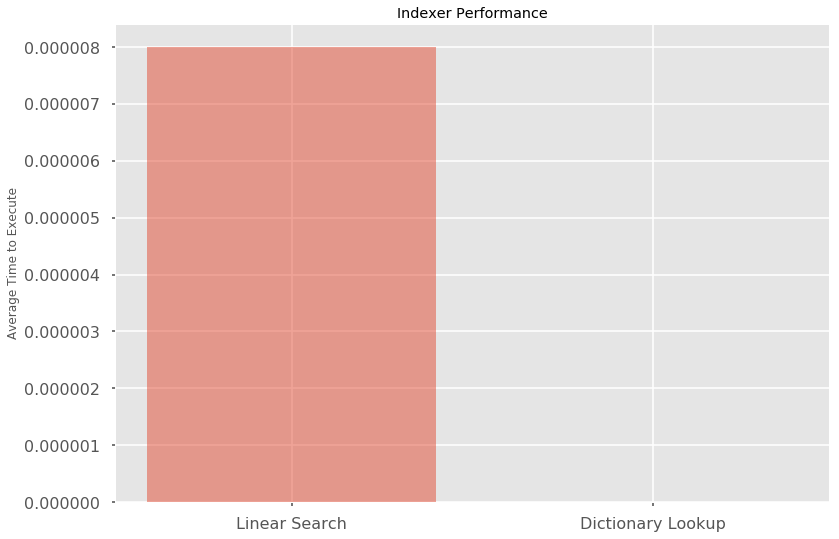

In [11]:
indexers = ('Linear Search', 'Dictionary Lookup')
y_pos = np.arange(len(indexers))
performance = [ls_time, lu_time]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, indexers)
plt.ylabel('Average Time to Execute')
plt.title('Indexer Performance')

plt.show()

In [13]:
names = quickSort(names) # Sort using Quick Sort, fast

In [16]:
indexes = [10, 30, 50, 70, 90, 100] # look-up positions

In [21]:
index_values = list()

for index in indexes:
    index_values.append(names[index-1]) # get values & account for offset (zero-based index)
    
index_values

['bzyoijtuuu',
 'ifbupnozql',
 'nauipukoyo',
 'svidqcnqye',
 'xtrfdphdrz',
 'zuuftmachb']

In [31]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Iterations', 'Linear Search', 'Binary Search', 'Dictionary Lookup'])

ls_time = profile(lambda: [[linear_search(names, n) for n in index_values] for x in range(iters)]) / iters
bs_time = profile(lambda: [[binary_search(names, n) for n in index_values] for x in range(iters)]) / iters
dc_time = profile(lambda: [[names_dict[n] for n in index_values] for x in range(iters)]) / iters

results.loc[0] = [iters, ls_time, bs_time, dc_time]

In [32]:
results # display the results table / DataFrame

,Iterations,Linear Search,Binary Search,Dictionary Lookup
0,1000.0,0.000014,0.000005,0.0


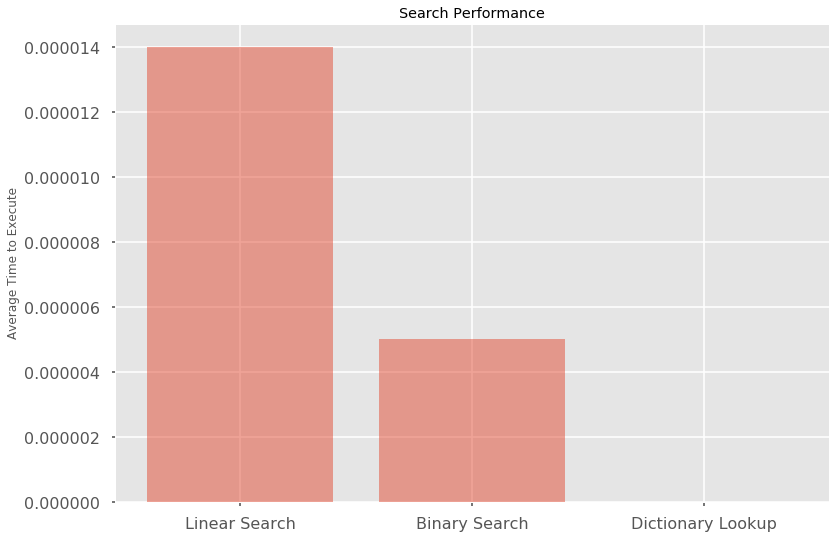

In [36]:
indexers = ('Linear Search', 'Binary Search', 'Dictionary Lookup')
y_pos = np.arange(len(indexers))
performance = [ls_time, bs_time, dc_time]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, indexers)
plt.ylabel('Average Time to Execute')
plt.title('Search Performance')

plt.show()

## Summary

In this lab we introduce the concept of a new data structure, the hash table, that has unique time-time properties we haven’t seen before. Specifically, the hash table is an indispensable data structure because it has O(1) asymptotic complexity for name-value pair look-ups. This property of hash tables makes them ideal candidates for building caching mechanisms that store values associated with a given key.

We should note that the constant time denoted here does not mean a single instruction cost is associated with looking up a value for a key, instead the notation refers to how the look-up time scales in respect to the number of elements in the container.

In the first test in the lab we construct a random array of indexes that are reflective of values we wish to retrieve from an existing data structure. First, we use the brute force approach of a linear search, which iterates over all the keys in the collection checking if it’s the value we want. As noted in previous labs, this brute force operation has an asymptotic complexity of N(n), or a liner scale. When this approach is compared to the hash-based look-up, it looks at though the dictionary does not even execute as the time is zero. It is important to understand that there are several actual operations occurring to find the value associated with the hash-based approach, however, the hash function makes this operation so efficient it is difficult to even compare to the linear approach.

The next test is even more telling in that in prior labs we have noted the vast improvement in run-time binary search has compared to linear search. Binary search does have one important caveat in that it requires the elements to be sorted for it to work. The sorting operation itself here, we chose Quick Sort in that it has an average case run-time of O(n log n), and works exceedingly well in real-world scenarios. If we consider the pre-requisite of the sorting operation, the binary search method does a little worse than is displayed in the output of figure 2. We should also note that regardless of sorted or not, the hash table method for look-ups is a constant O(1).

Hash tables are an indispensable tool in the data engineers toolbelt due to the unique performance characteristics they exhibit for associative data structures. There are entire database solutions that are used for high-performance caching (Dynamo, Redis, Riak, etc.) that solely perform this function as a complement to traditional relational models for the huge associated performance gain.